# Simple Linear Regression Demo

**Pipeline:** (Analysis + Dev Env) -> (Data Exploration and Pre-processing) -> Training -> Testing  -> (Validation with new data)


## Step 1: Problem Analysis and Framing

In [31]:
# for data manipulation
import pandas as pd

# for scientific computation
import numpy as np

# for data analysis
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm
from sklearn.model_selection import train_test_split

# for diagramming
import matplotlib.pyplot as plt
import seaborn as sns

# for serialization and deserialization of data from/to file
import pickle

## Step 2.1: Data Preparation

In [8]:
# read the data
df = pd.read_csv("student_scores.csv")

In [9]:
df.shape

(25, 2)

In [11]:
# get an idea of the look
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [12]:
# see which are the attribute labels
list(df)

['Hours', 'Scores']

In [13]:
# get idea of columns and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## Step 2.2: Get Asquainted with the Descriptive Statistics of Data

In [15]:
# get an idea of basic statistical parameters for each column
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [16]:
# if you want to change the format, for example to avoid the scientific notation e.g. e+04
pd.set_option('display.float_format', lambda x: '%.3f' % x)

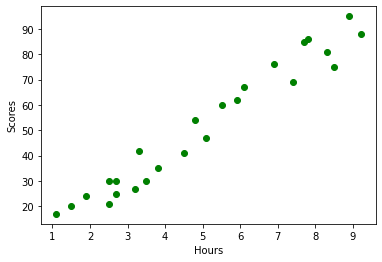

In [19]:
# plot all
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.scatter(df.Hours, df.Scores, color='green')
plt.show()

/Users/malenehansen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours', ylabel='Density'>

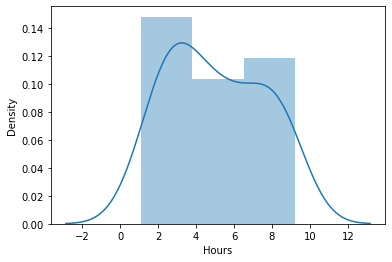

In [21]:
# sns.histplot(df['Hours'], label'Scores')
sns.distplot(df['Hours'], label='Scores', norm_hist=True)

# 2.3 Clean the Data

In [24]:
# check null values in data
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [26]:
corr_matrix = df.corr()
corr_matrix

,Hours,Scores
Hours,1.000,0.976
Scores,0.976,1.000


In [27]:
X = df['Hours'].values.reshape(-1,1)
y = df['Scores'].values.reshape(-1,1)

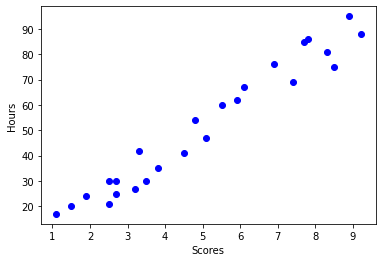

In [28]:
#plot all
plt.ylabel('Hours')
plt.xlabel('Scores')
plt.scatter(X, y, color='blue')
plt.show()

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [52]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20, 1)
(20, 1)
(5, 1)
(5, 1)


In [53]:
myreg = LinearRegression()

In [54]:
myreg.fit(X_train, y_train)

LinearRegression()

In [55]:
a = myreg.coef_
b = myreg.intercept_

In [56]:
a

array([[10.46110829]])

In [57]:
b

array([-1.53695733])

In [58]:
y_predicted = myreg.predict(X_test)

In [ ]:
plt.title('Linear regression')
plt.scatter(X, y, color='green')
plt.plot(X_train, a*X_train + b, color='blue')
plt